# Sources of Open Data

In [1]:
import addutils.toc ; addutils.toc.js(ipy_notebook=True)

In [2]:
import datetime
import scipy.io
import numpy as np
import pandas as pd

import pandas_datareader.data as web
import bokeh.plotting as bk
from IPython.display import display
bk.output_notebook()

Loading BokehJS ...

In [3]:
from addutils import css_notebook
css_notebook()

## 1 Yahoo! Finance

In [4]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2014, 5, 14)
AAPL_yahoo = web.DataReader("AAPL", 'yahoo', start, end)
IBM_yahoo = web.DataReader("IBM", 'yahoo', start, end)

### 1.1 Plotting timeseries with bokeh:

In [5]:
fig = bk.figure(x_axis_type = "datetime",
       tools="pan,box_zoom,reset", title = 'Closing Prices  - From Yahoo! Finance',
       plot_width=750, plot_height=400)
fig.line(AAPL_yahoo.index, AAPL_yahoo['Adj Close'],
     line_width=2, color='darkred', legend='Apple')
fig.line(IBM_yahoo.index, IBM_yahoo['Adj Close'],
     line_width=2, color='royalblue', legend='IBM')
fig.legend.location = "top_left"
bk.show(fig)

In [6]:
df = AAPL_yahoo[-100:]
mids = (df['High']+df['Low'])/2
spans = df['Close']-df['Open']
inc = df['Close']>=df['Open']
dec = df['Close']<df['Open']
w = 18*60*60*1000               # 2/3 of a day in ms

### 1.2 Plotting candlesticks with bokeh:

In [7]:
fig = bk.figure(x_axis_type = "datetime",
       tools="pan,box_zoom,reset",
       title = 'Candlesticks  - From Yahoo! Finance',
       plot_width=750, plot_height=400)
fig.segment(df.index, df['High'], df.index, df['Low'], color='black')
fig.rect(df[inc].index, mids[inc], w, spans[inc],
     fill_color="lawngreen", line_color="black")
fig.rect(df[dec].index, mids[dec], w, spans[dec],
     fill_color="crimson", line_color="black")
fig.legend.location = "top_left"
bk.show(fig)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/bokeh/models/plots.py:756: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with the 'legend' parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


### 1.3 Plotting data ranges with bokeh:

In [8]:
x = df.index.append(df.iloc[::-1].index)
y = df['Low'].append(df['High'].iloc[::-1])

fig = bk.figure(x_axis_type = "datetime",
       tools="pan,box_zoom,reset",
       title = "Mid Trading Values with Range  - From Yahoo! Finance",
       plot_width=750, plot_height=400)
fig.patch(x,y, color='darkred', alpha=0.3, line_color='violet', line_alpha=0.6)
fig.line(df.index, mids, line_width=2, color='darkred', legend='Apple')
bk.show(fig)

### 1.4 Plotting multiple plots with matplotlib:

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

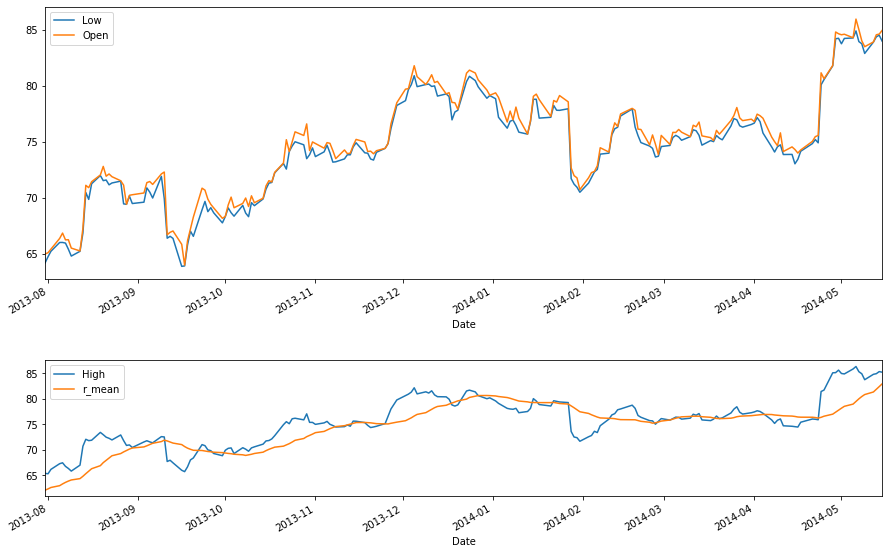

In [10]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(15,10));
fig = bk.figure(plot_width=300, plot_height=200)
gs = gridspec.GridSpec(2, 2, height_ratios=[2,1], hspace=0.4)
ax0 = plt.subplot(gs[0, :])
ax1 = plt.subplot(gs[1, :])
AAPL_yahoo.iloc[-200:,1:3].plot(ax=ax0)
AAPL_yahoo['r_mean'] = AAPL_yahoo['High'].rolling(window=20, center=False).mean()
AAPL_yahoo[['High', 'r_mean']][-200:].plot(ax=ax1)

### 1.5 Plotting multiple plots with Bokeh:

In [14]:
ax0 = bk.figure(plot_width=700, plot_height=300, title=None)
data0 = AAPL_yahoo.iloc[-200:,1:3]
ax0.line(x=np.arange(len(data0)), y=data0['Open'], 
         legend='Open', line_color='blue')
ax0.line(x=np.arange(len(data0)), y=data0['Low'], 
         legend='Low', line_color='green')

ax1 = bk.figure(plot_width=700, plot_height=300, title=None)
AAPL_yahoo['r_mean'] = AAPL_yahoo['High'].rolling(window=20, center=False).mean()
data1 = AAPL_yahoo.iloc[-200:]
ax1.line(x=np.arange(len(data1)), y=data1['High'],
         legend='High', line_color='blue')
ax1.line(x=np.arange(len(data1)), y=data1['r_mean'],
        legend='r_mean', line_color='green')

fig = bk.gridplot([[ax0], [ax1]])
bk.show(fig)

## 2 Federal Reserve Economic Data

Federal Reserve Economic Data **(FRED)** is an online database consisting of more than 148,000 economic data time series from 59 national, international, public, and private sources.

In [16]:
start = datetime.datetime(2005, 1, 1)
end = datetime.datetime(2014, 2, 1)
# LMUNRLTTATM647N Registered Unemployment Level for Austria
# LMUNRLTTDKM647N Registered Unemployment Level for Denmark
# LMUNRLTTDEM647N Registered Unemployment Level for Germany
# LMUNRLTTIEM647N Registered Unemployment Level for Ireland
unemployment = web.DataReader(['LMUNRLTTATM647N', 'LMUNRLTTDKM647N', 'LMUNRLTTDEM647N',
                            'LMUNRLTTIEM647N'], 'fred', start, end)

In [17]:
from bokeh.models.formatters import NumeralTickFormatter

fig = bk.figure(x_axis_type = "datetime",
               tools="pan,box_zoom,reset", title = 'Unemployment - Europe',
               plot_width=750, plot_height=300)
fig.line(unemployment.index, unemployment['LMUNRLTTATM647N'], 
         color='#800080', line_width=2, legend='Austria')
fig.line(unemployment.index, unemployment['LMUNRLTTDKM647N'],
         color='#008B8B', line_width=2, legend='Denmark')
fig.line(unemployment.index, unemployment['LMUNRLTTDEM647N'],
         color='#FF0000', line_width=2, legend='Germany')
fig.line(unemployment.index, unemployment['LMUNRLTTIEM647N'],
         color='#2E8B57', line_width=2, legend='Ireland')
fig.xaxis.major_label_text_font_size = "12pt"
fig.yaxis.axis_label = "Registered Unemployment Level"
fig.xaxis.axis_label = "Year"
fig.legend.location = "top_right"
fig.yaxis[0].formatter = NumeralTickFormatter(format='0,0')
bk.show(fig)

## 3 World Bank

The [World Bank’s World Development Indicators](http://data.worldbank.org/) is a huge database with thousands of panel data series. With Pandas it's possible to use the `search` function in `pandas.io.wb` to find your data:

In [18]:
from pandas_datareader import wb

If you wanted to compare the Gross Domestic Products per capita in constant dollars in North America:

In [19]:
wb.search('gdp.*capita.*const')

,id,name,source,sourceNote,sourceOrganization,topics,unit
646,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth,
8863,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$),World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth,
8865,NY.GDP.PCAP.KN,GDP per capita (constant LCU),World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth,
8867,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 internation...",World Development Indicators,GDP per capita based on purchasing power parit...,"b'World Bank, International Comparison Program...",Economy & Growth,
8868,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",WDI Database Archives,,b'',,


In [20]:
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['all'], start=2005, end=2012)

In [21]:
dat.head(10)

NY.GDP.PCAP.KD
country                year                
Arab World             2012     6278.734889
                       2011     6021.163952
                       2010     5945.678558
                       2009     5810.112070
                       2008     5926.091114
                       2007     5737.632893
                       2006     5620.174277
                       2005     5402.788764
Caribbean small states 2012     9167.923775
                       2011     9112.917086

In [22]:
grouped = dat['NY.GDP.PCAP.KD'].groupby(level=0).mean()
grouped.sort_values(axis=0, ascending=False, inplace=True)
grouped = grouped.dropna()
sample = 3
rich_poor = grouped.iloc[:sample].append(grouped.iloc[-sample:])
rich_poor.values

array([156549.21708163, 141200.38001028, 105180.52456616,    325.71238715,
          308.39792065,    230.11990917])

In [23]:
index = list(rich_poor.index)
fig = bk.figure(plot_width=750, plot_height=500, 
                title='Gross Domestic Products per capita - Rich vs Poor',
                x_range=index, y_axis_type='log', y_range=(0.01, 10**6))
fig.yaxis.minor_tick_out = 0
fig.xaxis.major_tick_out = 0
fig.segment(index, 0.01, index, rich_poor.values, line_width=35, color='#4C72B0')
bk.show(fig)

---

Visit [www.add-for.com](<http://www.add-for.com/>) for more tutorials and updates.

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.